This is the template for the image recognition exercise. <Br>
Some **general instructions**, read these carefully:

- The final assignment is returned as a clear and understandable _report_
  - define shortly the concepts and explain the phases you use
  - use the Markdown feature of the notebook for larger explanations
- return your output as a _working_ Jupyter notebook
- name your file as Exercise_MLPR2023_Partx_uuid.jpynb
  - use the uuid code determined below
  - use this same code for each part of the assignment
- write easily readable code with comments
  - if you exploit code from web, provide a reference
- it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation
  - in case of identical submissions, both submissions are failed


**Deadlines:**

- Part 1: Mon 6.2 at 23:59
- Part 2: Mon 20.2 at 23:59
- Part 3: Mon 6.3 at 23:59

**No extensions for the deadlines** <br>

- after each deadline, example results are given, and it is not possible to submit anymore

**If you encounter problems, Google first and if you can’t find an answer, ask for help**

- Moodle area for questions
- pekavir@utu.fi
- teacher available for questions
  - Monday 30.1 at 14:00-15:00 room 407B Honka (Agora 4th floor)
  - Monday 13.2 at 14:00-15:00 room 407B Honka (Agora 4th floor)
  - Thursday 2.3 at lecture 10:15-12:00


**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points.

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
7 exercise points: 1 exam point <br>
8 exercise points: 2 exam points <br>
9 exercise points: 3 exam points <br>
10 exercise points: 4 exam points <br>
11 exercise points: 5 exam points <br>
12 exercise points: 6 exam points <br>
<br>
To pass the exercise, you need at least 7 exercise points, and at least 1 exercise point from each Part.

Each student will grade one submission from a peer and their own submission. After each Part deadline, example results are given. Study them carefully and perform the grading according to the given instructions. Mean value from the peer grading and self-grading is used for the final points.


In [281]:
import uuid

# Run this cell only once and save the code. Use the same id code for each Part.
# Printing random id using uuid1()
print("The id code is: ", end="")
print(uuid.uuid1())


The id code is: a0956fac-adf2-11ed-917f-00155dab2d82


# Part 1


Read the original research article:

İ. Çınar and M. Koklu. Identification of rice varieties using machine learning algorithms. Journal of Agricultural Sciences, 28(2):307–325, 2022. doi: 10.15832/ankutbd.862482.

https://dergipark.org.tr/en/download/article-file/1513632


## Introduction (1 p)


Will be written in Part 3


## Preparations of the data (1 p)


Make three folders in your working folder: "notebooks", "data" and "training_data". Save this notebook in "notebooks" folder.
<br> <br>
Perform preparations for the data

- import all the packages needed for this notebook in one cell
- import the images. Data can be found from (downloading starts as you press the link) https://www.muratkoklu.com/datasets/vtdhnd09.php <br>
  - save the data folders "Arborio", "Basmati" and "Jasmine" in "data" folder
- take a random sample of 100 images from Arborio, Basmati and Jasmine rice species (i.e. 300 images in total)
- determine the contour of each rice (you can use e.g. _findContours_ from OpenCV)
- plot one example image of each rice species, including the contour


## Feature extraction (2 p)


Gather the feature data <br>
<br>
Color features (15) <br>

- Calculate the following color features for each image, including only the pixels within the contour (you can use e.g. _pointPolygonTest_ from OpenCV)
  - Mean for each RGB color channel
  - Variance for each RGB color channel
  - Skewness for each RGB color channel
  - Kurtosis for each RGB color channel
  - Entropy for each RGB color channel

Dimension features (6) <br>

- Fit an ellipse to the contour points (you can use e.g. _fitEllipse_ from OpenCV)
- Plot one example image of each rice species including the fitted ellipse
- Calculate the following features for each image (for details, see the original article)
  - the major axis length the ellipse
  - the minor axis length of the ellipse
  - area inside the contour (you can use e.g. _contourArea_ from OpenCV)
  - perimeter of the contour (you can use e.g. _arcLength_ from OpenCV)
  - roundness
  - aspect ratio

Gather all the features in one array or dataframe: one data point in one row, including all feature values in columns. <br>
For each data point, include also information of the original image and the label (rice species). Save the data in "training_data" folder.


In [282]:
from random import sample
import os
import cv2 as cv
import numpy as np
import argparse
import random as rng
import matplotlib.pyplot as plt
import pylab as plt
from PIL import Image
import statistics
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import entropy
import pandas as pd
import math
import time
from matplotlib import animation

In [283]:
# Arborio_items = os.listdir(
#     "/home/valtsu/projects/MLaPR/Rice_Image_Dataset/Data/Arborio/"
# )
# Basmati_items = os.listdir(
#     "/home/valtsu/projects/MLaPR/Rice_Image_Dataset/Data/Basmati/"
# )
# Jasmine_items = os.listdir(
#     "/home/valtsu/projects/MLaPR/Rice_Image_Dataset/Data/Jasmine/"
# )

In [284]:
Arborio_items = os.listdir("./Rice_Image_Dataset/data/Arborio/")
Basmati_items = os.listdir("./Rice_Image_Dataset/data/Basmati/")
Jasmine_items = os.listdir("./Rice_Image_Dataset/data/Jasmine/")


In [285]:
Arborio_path = "./Rice_Image_Dataset/data/Arborio/"
Basmati_path = "./Rice_Image_Dataset/data/Basmati/"
Jasmine_path = "./Rice_Image_Dataset/data/Jasmine/"


In [286]:
Arborio_sample_list = sample(Arborio_items, 100)
Basmati_sample_list = sample(Basmati_items, 100)
Jasmine_sample_list = sample(Jasmine_items, 100)


- take a random sample of 100 images from Arborio, Basmati and Jasmine rice species (i.e. 300 images in total)


In [287]:
# Generate list of sample images which includes 100 images of each species, Arborio, Basmati and Jasmin. 300 samples in total.

final_sample_list = []

for image in Arborio_sample_list:
    temp = []
    full_path = Arborio_path + image
    temp.append(full_path)
    temp.append(image)
    temp.append("Arborio")
    final_sample_list.append(temp)

for image in Basmati_sample_list:
    temp = []
    full_path = Basmati_path + image
    temp.append(full_path)
    temp.append(image)
    temp.append("Basmati")
    final_sample_list.append(temp)

for image in Jasmine_sample_list:
    temp = []
    full_path = Jasmine_path + image
    temp.append(full_path)
    temp.append(image)
    temp.append("Jasmine")
    final_sample_list.append(temp)


- determine the contour of each rice (you can use e.g. _findContours_ from OpenCV)


In [288]:
# A function to identify pixels that are inside the contours of the rice. Takes one source image of rice and its contours as parameters.
# Returns three lists of pixels that are inside the contours. Each list representing one color channel of BGR.


def calculate_pixels_included(source_image, image_contours):
    raw_dist = np.empty(
        (source_image.shape[0], source_image.shape[1]), dtype=np.float32
    )

    for i in range(source_image.shape[0]):
        for j in range(source_image.shape[1]):
            raw_dist[i, j] = cv.pointPolygonTest(image_contours[0], (i, j), False)


    pixels_included_blue = []
    pixels_included_green = []
    pixels_included_red = []

    for i in range(raw_dist.shape[0]):
        for j in range(raw_dist.shape[1]):
            if raw_dist[i, j] == 1:
                pixels_included_blue.append(source_image[i, j][0])
                pixels_included_green.append(source_image[i, j][1])
                pixels_included_red.append(source_image[i, j][2])

    return pixels_included_blue, pixels_included_green, pixels_included_red


In [289]:
# A funciton that finds smallest ellipse which can fit inside the contours of rice.


def fit_ellipse(contours):
    ellipse = [None] * len(contours)

    for i, c in enumerate(contours):
        if c.shape[0] > 5:
            ellipse[i] = cv.fitEllipse(c)

    return ellipse


In [290]:
def calculate_axis(features):
    contours = features[1]
    ellipse = features[21]

    major_axis = 0
    minor_axis = 0

    for i, c in enumerate(contours):
        if c.shape[0] > 5:
            current_ellipse = ellipse[i]
            major_axis = current_ellipse[1][0]
            minor_axis = current_ellipse[1][1]

    return major_axis, minor_axis


In [291]:
def calculate_ellipse_features(contours, major_ax, minor_ax):
    area = cv.contourArea(contours[0])
    perimeter = cv.arcLength(contours[0], True)
    roundness = (perimeter**2) / ((4 * math.pi * area))
    aspect_ratio = major_ax / minor_ax

    return area, perimeter, roundness, aspect_ratio


In [292]:
# Extracts different features of samples.

list_of_features = []


def extract_features(image):
    temp = []
    source_image = cv.imread(image[0])

    temp.append(image[0])

    source_gray = cv.cvtColor(source_image, cv.COLOR_BGR2GRAY)
    source_gray = cv.blur(source_gray, (2, 2))
    canny_output = cv.Canny(source_gray, 100, 200)

    # Using RETR_EXTERNAL. This should return only outer contour of the rice.
    # https://medium.com/analytics-vidhya/opencv-findcontours-detailed-guide-692ee19eeb18

    contours, hierarcy = cv.findContours(
        canny_output, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE
    )

    temp.append(contours)
    temp.append(canny_output)
    temp.append(hierarcy)
    temp.append(image[1])
    temp.append(image[2])

    (
        pixels_included_blue,
        pixels_included_green,
        pixels_included_red,
    ) = calculate_pixels_included(source_image, contours)

    temp.append(np.mean(pixels_included_blue))
    temp.append(np.mean(pixels_included_green))
    temp.append(np.mean(pixels_included_red))

    temp.append(statistics.variance(pixels_included_blue))
    temp.append(statistics.variance(pixels_included_green))
    temp.append(statistics.variance(pixels_included_red))

    temp.append(skew(pixels_included_blue, axis=0))
    temp.append(skew(pixels_included_green, axis=0))
    temp.append(skew(pixels_included_red, axis=0))

    temp.append(kurtosis(pixels_included_blue, axis=0))
    temp.append(kurtosis(pixels_included_green, axis=0))
    temp.append(kurtosis(pixels_included_red, axis=0))

    temp.append(entropy(pixels_included_blue, axis=0))
    temp.append(entropy(pixels_included_green, axis=0))
    temp.append(entropy(pixels_included_red, axis=0))

    temp.append(fit_ellipse(contours))

    major_axis, minor_axis = calculate_axis(temp)

    temp.append(major_axis)
    temp.append(minor_axis)

    area, perimeter, roundness, aspect_ratio = calculate_ellipse_features(
        contours, major_axis, minor_axis
    )

    temp.append(area)
    temp.append(perimeter)
    temp.append(roundness)
    temp.append(aspect_ratio)

    list_of_features.append(temp)


In [293]:
[extract_features(image) for image in final_sample_list]


AttributeError: 'numpy.ndarray' object has no attribute 'read'

- plot one example image of each rice species, including the contour


In [ ]:
# Show one example image of each rice and its contours


def show_sample(species):
    # Find firs occurrence of the spesific rice from list which includes all contours.
    sample = next(contours for contours in list_of_features if species in contours[0])

    file_path = sample[0]
    contours = sample[1]
    canny_output = sample[2]
    hierarcy = sample[3]
    ellipse = sample[21]

    drawing = np.zeros(
        (canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8
    )

    for i in range(len(contours)):
        color = (rng.randint(0, 256), rng.randint(0, 256), rng.randint(0, 256))
        cv.drawContours(drawing, contours, i, color, 2, cv.LINE_8, hierarcy, 0)

    for i, c in enumerate(contours):
        color = (rng.randint(0, 256), rng.randint(0, 256), rng.randint(0, 256))
        if c.shape[0] > 5:
            current_ellipse = ellipse[i]
            center = (round(current_ellipse[0][0]), round(current_ellipse[0][1]))
            width = current_ellipse[1][0]
            height = current_ellipse[1][1]
            axes_radius = (
                np.array(
                    (
                        (np.rint(width)).astype(int) / 2,
                        (np.rint(height)).astype(int) / 2,
                    )
                )
            ).astype(int)
            angle = current_ellipse[2]

            # cv.ellipse(image, center of the ellipse (array), axes radius (array of integers), angle , 0, 360, color)

            cv.ellipse(
                img=drawing,
                center=center,
                axes=axes_radius,
                angle=angle,
                startAngle=0,
                endAngle=360,
                color=color,
            )

    fig = plt.figure(figsize=(11, 11))

    rows = 1
    columns = 2

    xs = np.linspace(0, 2 * np.pi, 60)
    ys = np.abs(np.sin(xs))

    ax = []

    ax.append(fig.add_subplot(rows, columns, 1))
    ax[-1].set_title("Source image: " + species)
    plt.imshow(cv.imread(file_path))

    ax.append(fig.add_subplot(rows, columns, 2))
    ax[-1].set_title("Contour & ellipse: " + species)
    plt.imshow(drawing)


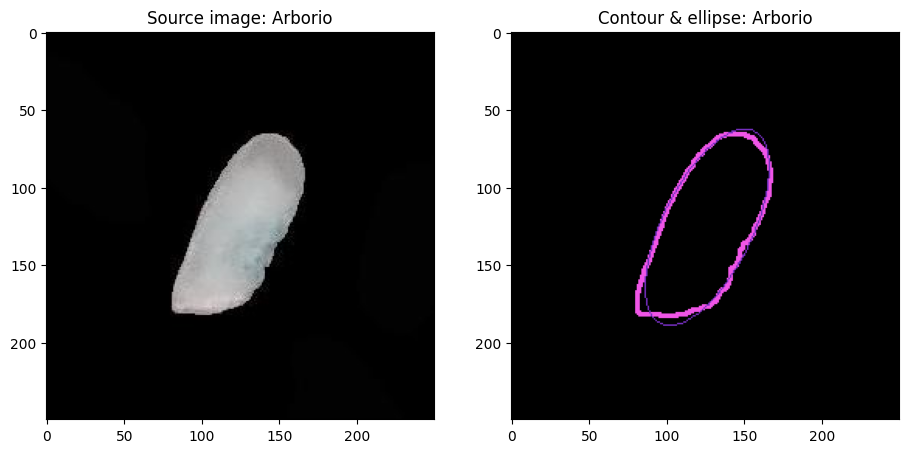

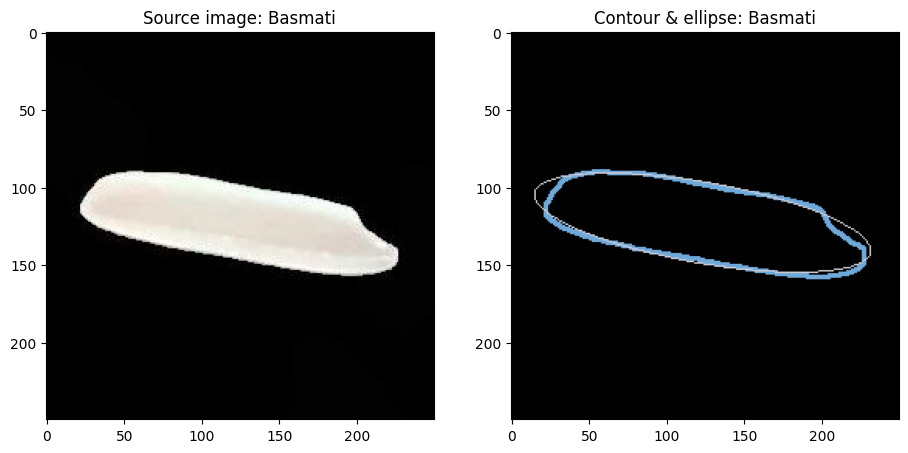

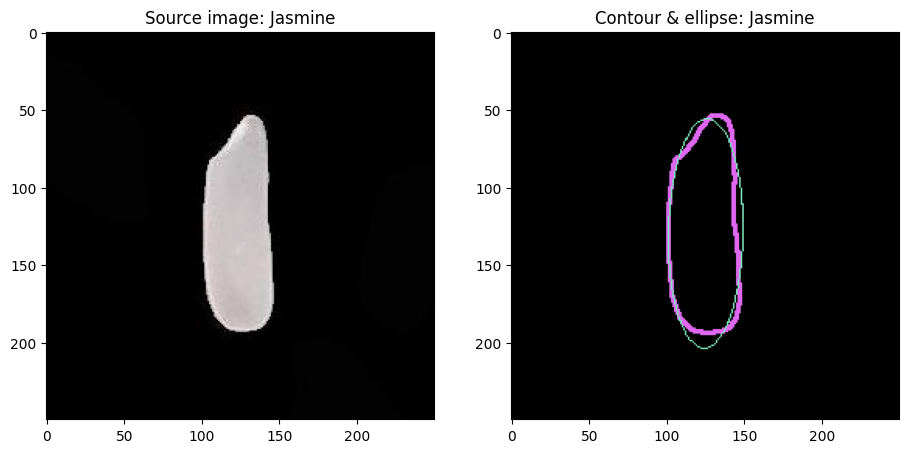

In [ ]:
show_sample("Arborio")
show_sample("Basmati")
show_sample("Jasmine")
plt.show()


In [ ]:
df = pd.DataFrame(list_of_features)
df.columns = [
    "Full path",
    "Contours",
    "Canny output",
    "Hierarcy",
    "File name",
    "Species",
    "Mean B",
    "Mean G",
    "Mean R",
    "Variance B",
    "Variance G",
    "Variance R",
    "Skew B",
    "Skew G",
    "Skew R",
    "kurtosis B",
    "kurtosis G",
    "kurtosis R",
    "entropy B",
    "entropy G",
    "entropy R",
    "Ellipse",
    "Major axis",
    "Minor axis",
    "Area",
    "Perimeter",
    "Roundness",
    "Aspect ratio",
]

In [ ]:
df.sample(10)

,Full path,Contours,Canny output,Hierarcy,File name,Species,Mean B,Mean G,Mean R,Variance B,...,entropy B,entropy G,entropy R,Ellipse,Major axis,Minor axis,Area,Perimeter,Roundness,Aspect ratio
24,./Rice_Image_Dataset/data/Arborio/Arborio (937...,"([[[95 92]], [[94 93]], [[83 93]], [[82 94]], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[-1, -1, -1, -1]]]",Arborio (9375).jpg,Arborio,219.823817,212.761697,212.463257,7,...,8.925493,8.924262,8.924454,"[((121.66329956054688, 125.8705825805664), (67...",67.994003,149.548965,7730.0,370.592927,1.413855,0.454660
182,./Rice_Image_Dataset/data/Basmati/basmati (123...,"([[[113 17]], [[109 21]], [[109 22]], [[108...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[-1, -1, -1, -1]]]",basmati (12395).jpg,Basmati,234.418721,225.481086,224.856072,5,...,9.079522,9.078391,9.078366,"[((122.59613800048828, 120.16722869873047), (5...",56.592106,220.863327,9029.5,490.208151,2.117812,0.256231
198,./Rice_Image_Dataset/data/Basmati/basmati (756...,"([[[168 49]], [[167 50]], [[165 50]], [[164...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[-1, -1, -1, -1]]]",basmati (7568).jpg,Basmati,235.203838,220.561594,218.121712,13,...,8.904596,8.902999,8.902862,"[((118.63663482666016, 122.28916931152344), (4...",49.690117,203.223434,7624.0,435.470124,1.979356,0.244510
49,./Rice_Image_Dataset/data/Arborio/Arborio (109...,"([[[102 58]], [[101 59]], [[98 59]], [[97 60...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[-1, -1, -1, -1]]]",Arborio (10909).jpg,Arborio,222.704266,216.443260,217.371206,36,...,8.893675,8.893176,8.893174,"[((124.98200225830078, 124.96237182617188), (7...",70.162270,137.818527,7469.0,359.220343,1.374832,0.509092
173,./Rice_Image_Dataset/data/Basmati/basmati (123...,"([[[65 63]], [[64 64]], [[63 64]], [[58 69]], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[-1, -1, -1, -1]]]",basmati (12361).jpg,Basmati,239.714609,212.952406,214.954672,9,...,8.651937,8.649025,8.649351,"[((124.4665298461914, 121.53610229492188), (42...",42.033302,181.782288,5890.5,393.428495,2.091075,0.231229
108,./Rice_Image_Dataset/data/Basmati/basmati (143...,"([[[179 60]], [[178 61]], [[176 61]], [[175...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[-1, -1, -1, -1]]]",basmati (14378).jpg,Basmati,218.999879,221.255147,211.929281,117,...,9.007698,9.007230,9.005899,"[((121.92835998535156, 122.33515930175781), (6...",61.413403,180.517273,8425.0,418.842710,1.656999,0.340208
257,./Rice_Image_Dataset/data/Jasmine/Jasmine (830...,"([[[130 103]], [[129 104]], [[102 104]], [[101...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[-1, -1, -1, -1]]]",Jasmine (830).jpg,Jasmine,228.650253,215.865856,214.417629,204,...,8.501695,8.501395,8.501411,"[((127.978515625, 125.88589477539062), (47.430...",47.430408,150.966858,5092.5,343.923880,1.848348,0.314178
17,./Rice_Image_Dataset/data/Arborio/Arborio (836...,"([[[138 86]], [[137 87]], [[126 87]], [[125...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[-1, -1, -1, -1]]]",Arborio (8365).jpg,Arborio,219.841772,212.627545,212.303522,254,...,8.884716,8.883712,8.883906,"[((123.67304992675781, 121.45328521728516), (7...",75.056541,130.298676,7421.0,350.249781,1.315478,0.576035
32,./Rice_Image_Dataset/data/Arborio/Arborio (679...,"([[[88 83]], [[87 84]], [[84 84]], [[83 85]], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[-1, -1, -1, -1]]]",Arborio (6790).jpg,Arborio,221.859005,216.483989,215.899760,193,...,8.969673,8.969030,8.969168,"[((123.84286499023438, 123.51380157470703), (7...",73.730324,143.590073,8063.5,374.634557,1.385103,0.513478
297,./Rice_Image_Dataset/data/Jasmine/Jasmine (281...,"([[[130 55]], [[129 56]], [[124 56]], [[123...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[-1, -1, -1, -1]]]",Jasmine (2811).jpg,Jasmine,229.919491,215.824605,216.941877,229,...,8.487523,8.486991,8.487042,"[((123.96178436279297, 119.79718780517578), (4...",45.135647,144.772278,5017.5,329.237588,

In [ ]:
df["kurtosis B"].max()

164.32436648619543

In [ ]:
df2 = df.drop(columns=["Contours", "Canny output", "Hierarcy", "Ellipse"] ,axis=1)

In [ ]:
df2.to_parquet("./training_data/rice_feature_data.parquet")

In [ ]:
df.iloc[108,:]

Full path       ./Rice_Image_Dataset/data/Basmati/basmati (143...
Contours        ([[[179  60]], [[178  61]], [[176  61]], [[175...
Canny output    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Hierarcy                                     [[[-1, -1, -1, -1]]]
File name                                     basmati (14378).jpg
Species                                                   Basmati
Mean B                                                 218.999879
Mean G                                                 221.255147
Mean R                                                 211.929281
Variance B                                                    117
Variance G                                                    218
Variance R                                                      3
Skew B                                                  -6.793685
Skew G                                                  -5.310545
Skew R                                                   -4.30192
kurtosis B

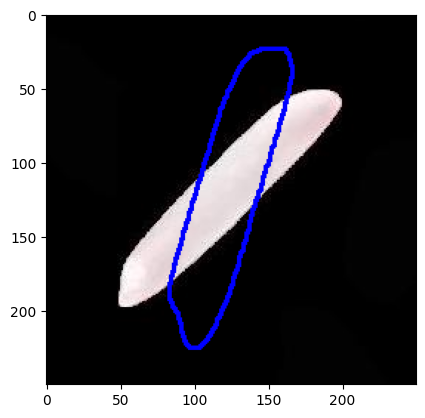

In [ ]:
drawing = cv.imread("./Rice_Image_Dataset/data/Basmati/basmati (3985).jpg")
cv.drawContours(drawing, df.iloc[105,1], 0, (0,0,256), 2, cv.LINE_8, df.iloc[105,3], 0)
plt.imshow(drawing)